In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from bs4 import BeautifulSoup as bs
import requests as re

In [2]:
url = 'https://www.worldometers.info/geography/how-many-countries-are-there-in-the-world/'
#scraping the data of Countries in the World:

In [3]:
r = re.get(url) #Getting response form the website 
print(r)        #If Respnse is 200, it is a valid response

<Response [200]>


In [4]:
 # parsing the response by using html.parser
world = bs(r.content, 'html.parser') 
world 


<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]--><!--[if IE 9]> <html lang="en" class="ie9"> <![endif]--><!--[if !IE]><!--> <html lang="en"> <!--<![endif]--> <head> <meta charset="utf-8"/> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=device-width, initial-scale=1" name="viewport"/> <title>How many countries are there in the world? (2023) - Total &amp; List | Worldometer</title><!-- Favicon --><link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/><link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/><link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/><link href="/favicon/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/><link href="/favicon/apple-icon-76x76.png" rel="apple-touch-icon" sizes="76x76"/><link href="/favicon/apple-icon-114x114.png" rel="apple-touch-icon" sizes="114x114"/><link href="/favicon/apple-icon-120x120.png" rel="apple-touch-ico

In [5]:
r1 = world.findAll('td')
print(len(r1))

975


In [6]:

d1 = world.select('td')[0].text
d2 = world.select('td')[1].text
d3 = world.select('td')[2].text
d4 = world.select('td')[3].text
d5 = world.select('td')[4].text
d6 = world.select('td')[5].text
d7 = world.select('td')[6].text
d8 = world.select('td')[7].text
# Printing the first 8 data entries from the 'td' tag
d1,d2,d3,d4,d5,d6,d7,d8

('1',
 'China',
 '1,439,323,776',
 '18.5 %',
 '9,388,211',
 '2',
 'India',
 '1,380,004,385')

In [7]:
data=[] # Making an empty list 

In [8]:
for i in range (0,len(r1),5):
        Sr_no = world.select('td')[i].text
        Country = world.select('td')[i+1].text
        Population_2020 = world.select('td')[i+2].text
        World_Share = world.select('td')[i+3].text
        Land_Area = world.select('td')[i+4].text
        data.append((
            Sr_no,Country,
            int(Population_2020.replace(',', '')),
            float(World_Share.replace('%', '')),
            int(Land_Area.replace(',', '')),))

In [9]:
print(data)

[('1', 'China', 1439323776, 18.5, 9388211), ('2', 'India', 1380004385, 17.7, 2973190), ('3', 'United States', 331002651, 4.2, 9147420), ('4', 'Indonesia', 273523615, 3.5, 1811570), ('5', 'Pakistan', 220892340, 2.8, 770880), ('6', 'Brazil', 212559417, 2.7, 8358140), ('7', 'Nigeria', 206139589, 2.6, 910770), ('8', 'Bangladesh', 164689383, 2.1, 130170), ('9', 'Russia', 145934462, 1.9, 16376870), ('10', 'Mexico', 128932753, 1.7, 1943950), ('11', 'Japan', 126476461, 1.6, 364555), ('12', 'Ethiopia', 114963588, 1.5, 1000000), ('13', 'Philippines', 109581078, 1.4, 298170), ('14', 'Egypt', 102334404, 1.3, 995450), ('15', 'Vietnam', 97338579, 1.2, 310070), ('16', 'DR Congo', 89561403, 1.1, 2267050), ('17', 'Turkey', 84339067, 1.1, 769630), ('18', 'Iran', 83992949, 1.1, 1628550), ('19', 'Germany', 83783942, 1.1, 348560), ('20', 'Thailand', 69799978, 0.9, 510890), ('21', 'United Kingdom', 67886011, 0.9, 241930), ('22', 'France', 65273511, 0.8, 547557), ('23', 'Italy', 60461826, 0.8, 294140), ('24'

In [10]:
# create DataFrame using data by defining thecolumn headers
df = pd.DataFrame(data, columns =['Sr_no','Country','Population(2020)','World_Share(%)','Land_Area_Km²'])

In [11]:
df.head() #Showing top 5 entries from the data

,Sr_no,Country,Population(2020),World_Share(%),Land_Area_Km²
0,1,China,1439323776,18.5,9388211
1,2,India,1380004385,17.7,2973190
2,3,United States,331002651,4.2,9147420
3,4,Indonesia,273523615,3.5,1811570
4,5,Pakistan,220892340,2.8,770880


In [12]:
# saving the dataframe
df.to_csv('WorldPopulation_2020_data.csv', index=False)

In [13]:
df.columns

Index(['Sr_no', 'Country', 'Population(2020)', 'World_Share(%)',
       'Land_Area_Km²'],
      dtype='object')

In [14]:
df.shape #row  = 195 and columns = 5

(195, 5)

In [15]:
df.isnull().sum() #there is no null values

Sr_no               0
Country             0
Population(2020)    0
World_Share(%)      0
Land_Area_Km²       0
dtype: int64

In [16]:
df.duplicated().sum()

0

In [17]:
m = df['Population(2020)']/1000000 
#as population value was not readable so that i have devided the population value by 1000000

In [18]:
## Analyzing the Data

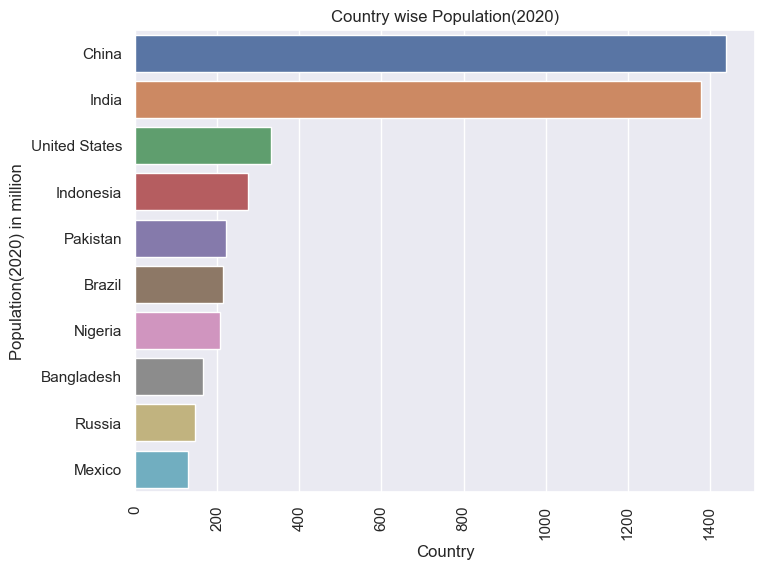

In [19]:
### using seaborn
# Country vs Land_Area_Km² for top 10 countries by population 
sns.set(rc={'figure.figsize':(8,6)})
sns.barplot(data = df, y = df['Country'].head(10), x = m.head(10))
plt.title('Country wise Population(2020)')
sns.set_style('darkgrid')
plt.xlabel('Country') # setting x-label
plt.ylabel('Population(2020) in million')  # setting y-label
plt.xticks(rotation=90)
# Showing the plot
plt.show()

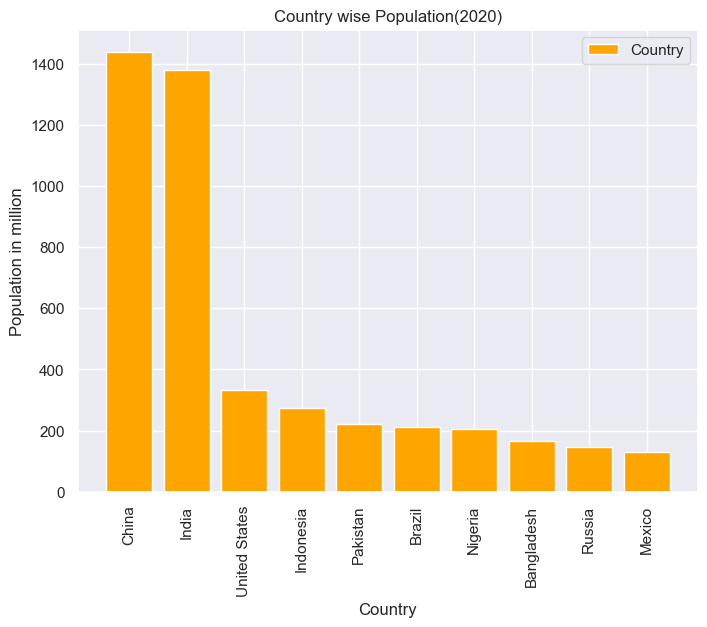

In [24]:
# Country vs Land_Area_Km² for top 10 countries by population 
plt.figure(figsize=(8,6))
plt.bar(df['Country'].head(10), m.head(10), label = 'Country', color = 'orange')
plt.title('Country wise Population(2020)')
plt.xlabel('Country') # setting x-label
plt.ylabel('Population in million')  # setting y-label
plt.legend()
plt.xticks(rotation=90)
# Showing the plot
plt.show()

In [21]:
l = df['Land_Area_Km²']/1000
l.head()

0    9388.211
1    2973.190
2    9147.420
3    1811.570
4     770.880
Name: Land_Area_Km², dtype: float64

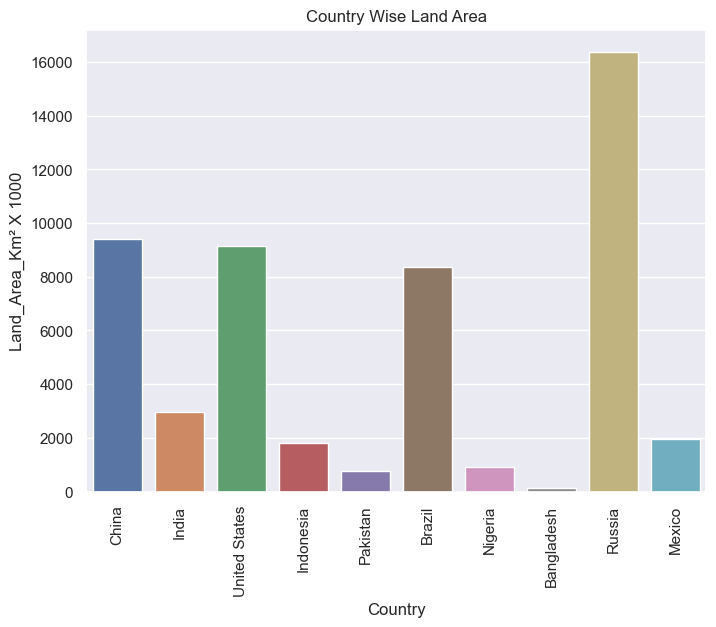

In [22]:
### using seaborn
# Population vs Land_Area_Km² for top 10 countries by population 
sns.set(rc={'figure.figsize':(8,6)})
sns.barplot(data = df, x = df['Country'].head(10), y = l.head(10))
plt.title('Country Wise Land Area')
sns.set_style('darkgrid')
plt.xlabel('Country') # setting x-label
plt.ylabel('Land_Area_Km² X 1000')  # setting y-label
plt.xticks(rotation=90)
# Showing the plot
plt.show()

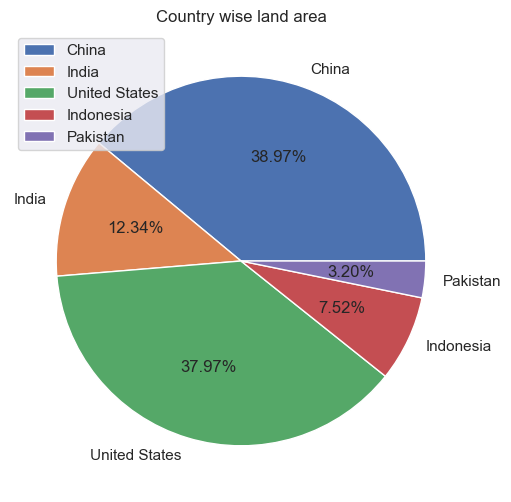

In [23]:
plt.pie(df['Land_Area_Km²'].head(5), labels = df['Country'].head(5),autopct='%0.2f%%')
plt.title('Country wise land area')
plt.legend(loc = 2)
plt.show()